## Aluno: Paulo Araujo Barbosa

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [1]:
# resposta 1
import pandas as pd 
import numpy as np 
import altair as alt 
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('house_prices.csv', sep = ';')
print(df1.head())
print('\n')
print(df1.isna().sum())
df1.update(df1['tamanho'].fillna(np.mean(df1['tamanho'])))
df1.update(df1['n_quartos'].fillna(np.mean(df1['n_quartos'])))
df1.update(df1['idade'].fillna(np.mean(df1['idade'])))
print('\n')
print(df1.isna().sum())
print('\n')
print(df1[df1.duplicated()])
print('\n')
print(len(df1))

df1 = df1.drop_duplicates()
print('\n')
print(len(df1))

   tamanho  n_quartos  idade   preco
0   2104.0        3.0   45.0  399900
1   2104.0        3.0   45.0  399900
2   1600.0        3.0   30.0  329900
3   2400.0        3.0   32.0  369000
4   1416.0        2.0   10.0  232000


tamanho      1
n_quartos    1
idade        2
preco        0
dtype: int64


tamanho      0
n_quartos    0
idade        0
preco        0
dtype: int64


   tamanho  n_quartos  idade   preco
1   2104.0        3.0   45.0  399900


50


49


## 2) Há outliers no data set? Se sim, trate-os de forma adequada. Use box-plots para confirmar a presença de outliers

AxesSubplot(0.125,0.125;0.775x0.755)


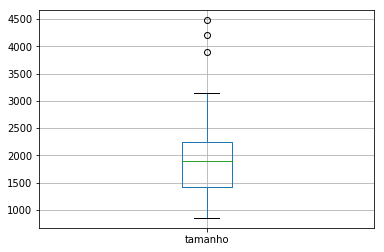

In [2]:
# resposta 2
# remover os outliers
print(df1.boxplot(column='tamanho'))

AxesSubplot(0.125,0.125;0.775x0.755)


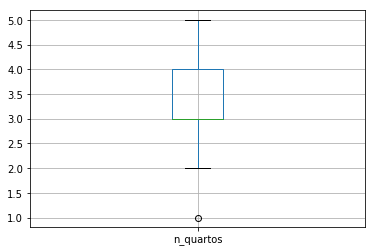

In [3]:
print(df1.boxplot(column='n_quartos')) 

AxesSubplot(0.125,0.125;0.775x0.755)


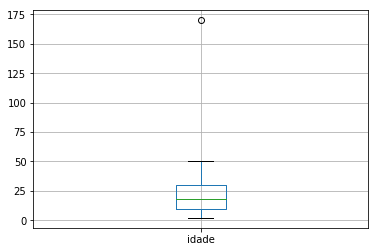

In [4]:
print(df1.boxplot(column='idade'))

AxesSubplot(0.125,0.125;0.775x0.755)


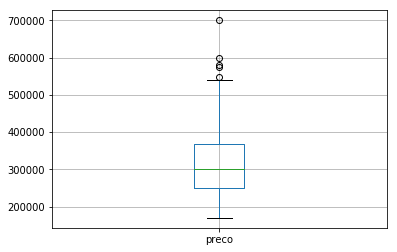

In [5]:
print(df1.boxplot(column='preco'))

In [15]:
print(df1.describe())
print('\n')
print(np.mean(df1, axis=0))
print('\n')
print(len(df1))
print('\n')
print(df1.head())

           tamanho  n_quartos       idade          preco
count    49.000000  49.000000   49.000000      49.000000
mean   1988.381508   3.145773   23.061224  336516.020408
std     782.561794   0.763479   24.842133  123890.237587
min     852.000000   1.000000    2.000000  169900.000000
25%    1427.000000   3.000000   10.000000  249890.000000
50%    1888.000000   3.000000   18.000000  299900.000000
75%    2238.000000   4.000000   30.000000  369000.000000
max    4478.000000   5.000000  170.000000  699900.000000


tamanho        1988.381508
n_quartos         3.145773
idade            23.061224
preco        336516.020408
dtype: float64


49


   tamanho  n_quartos  idade   preco
0   2104.0        3.0   45.0  399900
2   1600.0        3.0   30.0  329900
3   2400.0        3.0   32.0  369000
4   1416.0        2.0   10.0  232000
5   3000.0        4.0   14.0  539900


In [54]:
#Usando Z-score
from scipy import stats
df2 = df1
z = np.abs(stats.zscore(df2))
df2 = df2[(z < 3).all(axis=1)]     

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 49
Data columns (total 4 columns):
tamanho      47 non-null float64
n_quartos    47 non-null float64
idade        47 non-null float64
preco        47 non-null int64
dtypes: float64(3), int64(1)
memory usage: 1.8 KB


## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [56]:
# resposta 3

df2.insert(len(df2.columns),'n_andares', np.random.randint(1, 3, size = len(df2)))
df2.head()

,tamanho,n_quartos,idade,preco,n_andares
0,2104.0,3.0,45.0,399900,1
2,1600.0,3.0,30.0,329900,2
3,2400.0,3.0,32.0,369000,2
4,1416.0,2.0,10.0,232000,1
5,3000.0,4.0,14.0,539900,2


## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

Text(0, 0.5, 'preco')

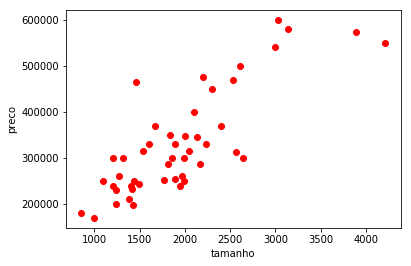

In [62]:
# resposta 4
plt.plot(df2['tamanho'], df2['preco'], 'o', color='red')
plt.xlabel('tamanho')
plt.ylabel('preco')

Text(0, 0.5, 'preco')

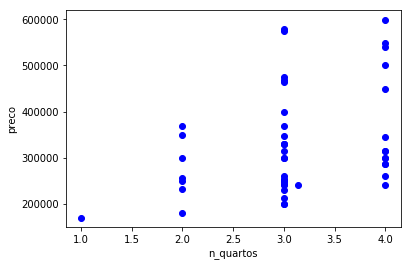

In [63]:
plt.plot(df2['n_quartos'], df2['preco'], 'o', color='blue')
plt.xlabel('n_quartos')
plt.ylabel('preco')

Text(0, 0.5, 'preco')

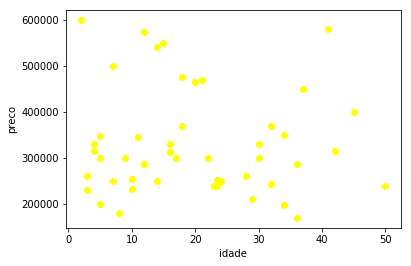

In [64]:
plt.plot(df2['idade'], df2['preco'], 'o', color='yellow')
plt.xlabel('idade')
plt.ylabel('preco')

Text(0, 0.5, 'preco')

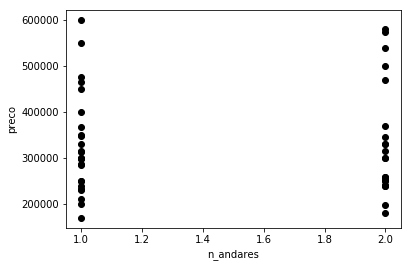

In [65]:
plt.plot(df2['n_andares'], df2['preco'], 'o', color='black')
plt.xlabel('n_andares')
plt.ylabel('preco')

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [66]:
# resposta 5
from sklearn.model_selection import train_test_split

features = ['tamanho','n_quartos','idade','n_andares']
meta = ['preco']

X = df2[features].values
y = df2[meta].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=15)

## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [67]:
# resposta 6
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

regressao_modelo = linear_model.LinearRegression()
regressao_modelo.fit(X_train, y_train.ravel())

y_pred_train = regressao_modelo.predict(X_train)
mean_squared_error(y_train,y_pred_train)

3199565229.6272917

## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? Retorne um DataFrame contendo valor predito na primeira coluna e valor verdadeiro na segunda

In [68]:
# resposta 7
# predict
y_pred_test = regressao_modelo.predict(X_test)
pd.DataFrame(data={'valor_predito': [y_pred_test], 'valor_verdadeiro': [y_test]})

,valor_predito,valor_verdadeiro
0,"[265193.096358177, 197674.6553776558, 283404.7...","[[464500], [249900], [232000], [169900], [5490..."
